### Complete case analysis

Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in discarding observations where values in any of the variables are missing.
Complete Case Analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset.

Assumption for CCA is, that total missing values are less than 5% of the total dataset

<b>Advantage</b>
1. Easy to implement as no data manipulation required
2. Preserves variable distribution (if data is (Missing Completely at Random) MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset
   
<b>Disadvantage</b>
1. It can exclude a large fraction of the original dataset (if missing data is abundant)
2. Excluded observations could be informative for the analysis (if data is not missing at random)
3. When using our models in production, the model will not know how to handle missing data

https://learndata.xyz/posts/types%20of%20missing%20data%20mcar,%20mar,%20and%20mnar%20explained/

# 1. Simple Imputer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
round(df.isnull().mean() * 100,1)

Age         19.9
Fare         5.1
Family       0.0
Survived     0.0
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Fill missing values with Arbitary values

In [10]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [11]:
X_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [13]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after filling missing values with 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after filling missing values with imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance filling missing values with imputation: ', X_train['Fare_999'].var())
print('Fare Variance filling missing values with imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after filling missing values with 99 imputation:  951.7275570187188
Age Variance after filling missing values with imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance filling missing values with imputation:  47219.202652176304
Fare Variance filling missing values with imputation:  2378.5676784883494


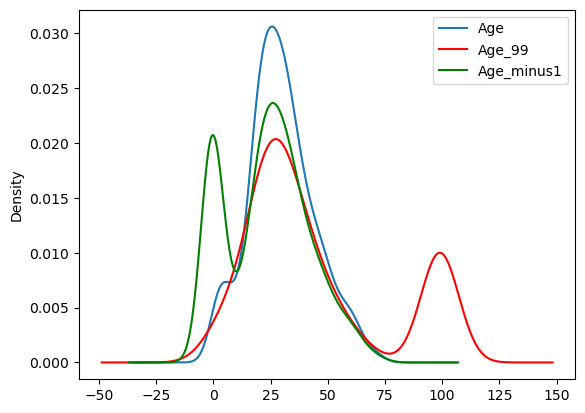

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

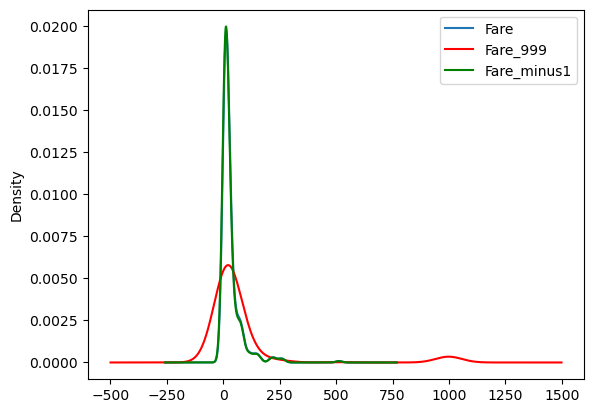

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [17]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### Fill missing values with Arbitary values - Using Sklearn

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [20]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [21]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [22]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [23]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [24]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [25]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]], shape=(712, 3))

# 2. Mean Median Imputation

- **Benefits** Simple, and applicable where missing values < 5%
- **Disadvantages** Distribution shape change, Outliers are not handled, Covariance, and correlation changes

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [27]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [29]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [33]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [34]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [35]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [36]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
694,60.0,26.5500,0,60.00,60.000000,26.5500,26.5500
664,20.0,7.9250,1,20.00,20.000000,7.9250,7.9250
415,NaN,8.0500,0,28.75,29.785904,8.0500,8.0500
4,35.0,8.0500,0,35.00,35.000000,8.0500,8.0500
127,24.0,7.1417,0,24.00,24.000000,7.1417,7.1417


In [37]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


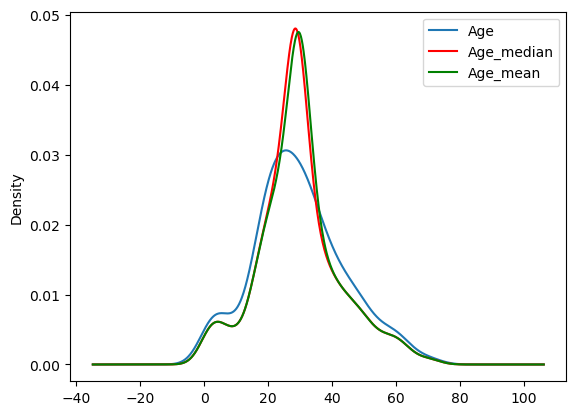

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

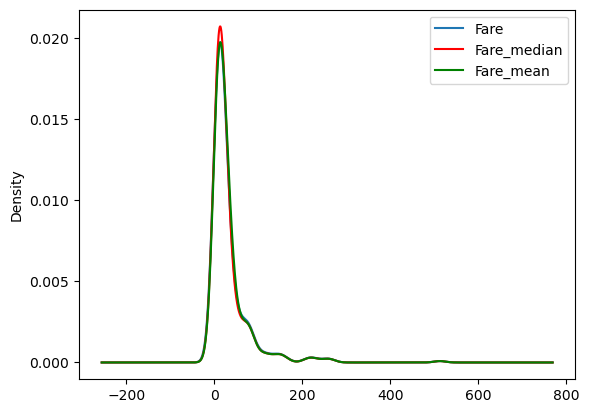

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [40]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [41]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

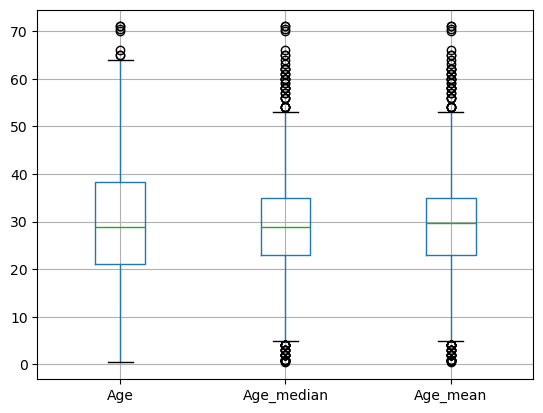

In [42]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

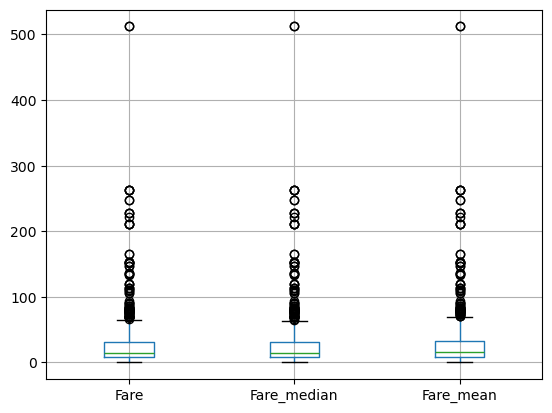

In [43]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Mean Median Imputation - using Sklearn

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [46]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [47]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [48]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [49]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [50]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [51]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))

# 3. Frequent value imputation

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [55]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

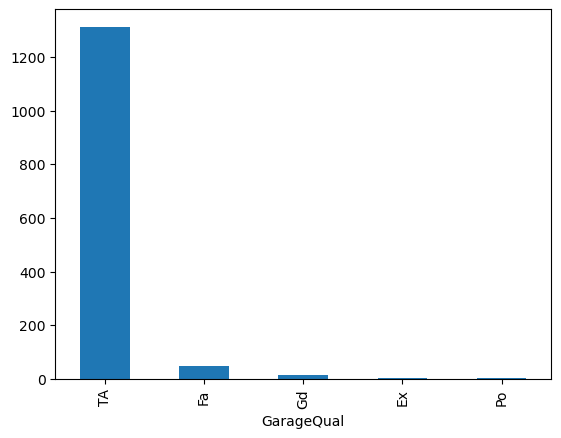

In [56]:
df['GarageQual'].value_counts().plot(kind='bar')

In [57]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

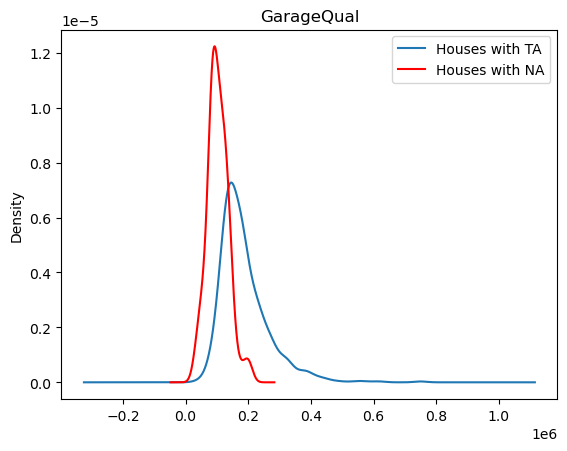

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [59]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [61]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

<Axes: xlabel='GarageQual'>

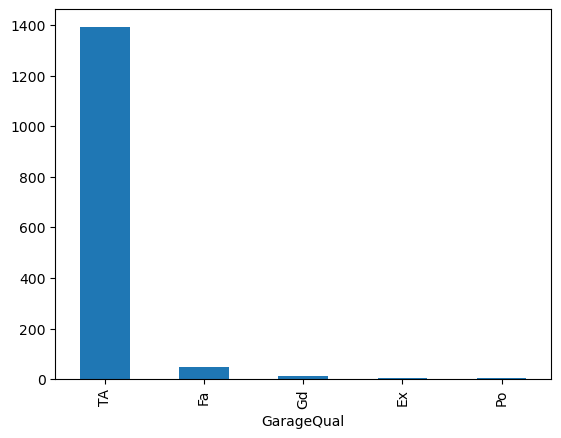

In [62]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

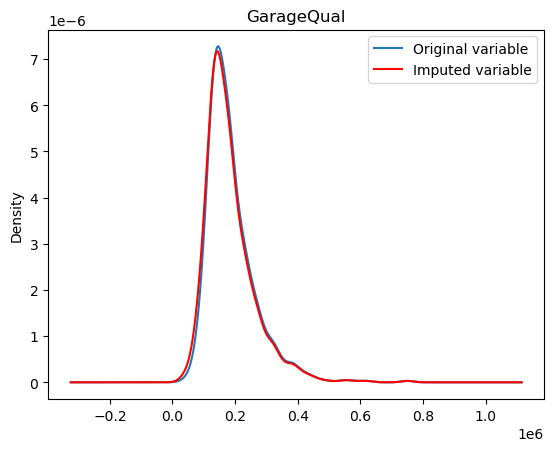

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

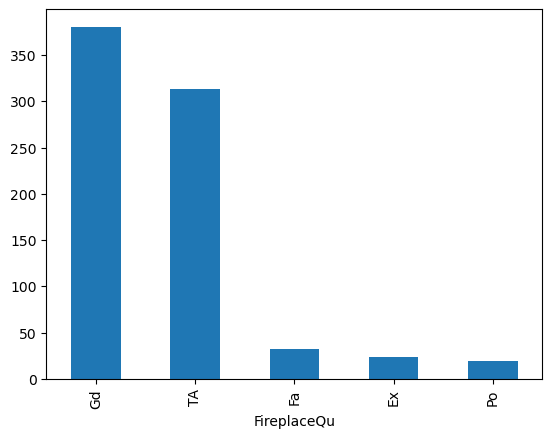

In [64]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [65]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

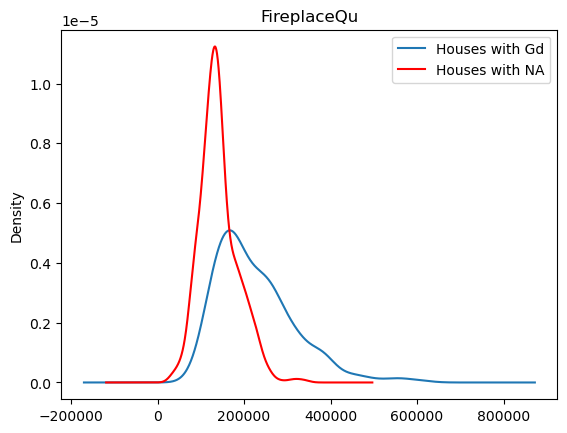

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [67]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [69]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')

Text(0.5, 1.0, 'FireplaceQu')

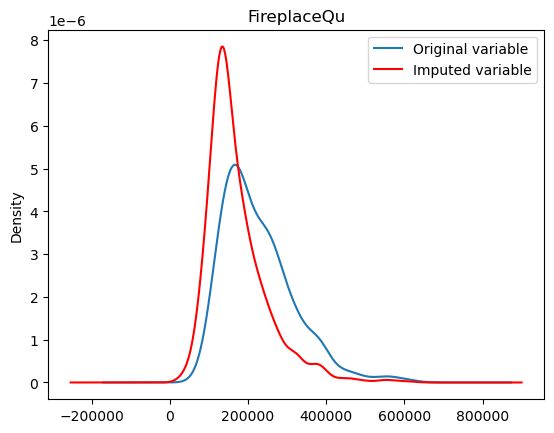

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
imputer = SimpleImputer(strategy='most_frequent')

In [73]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Nishant.Chauhan\Anaconda3\envs\100ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [74]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# 4. Missing Categorical value imputation

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [76]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

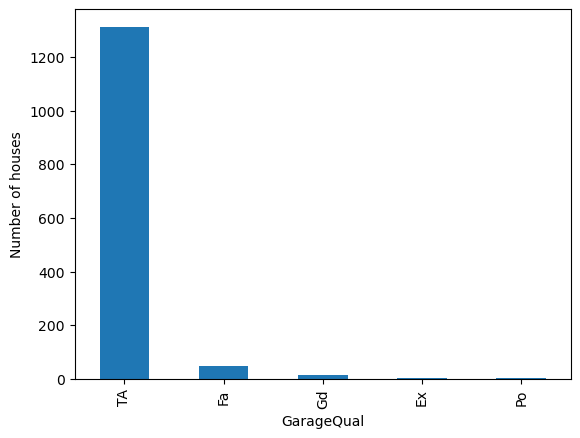

In [77]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

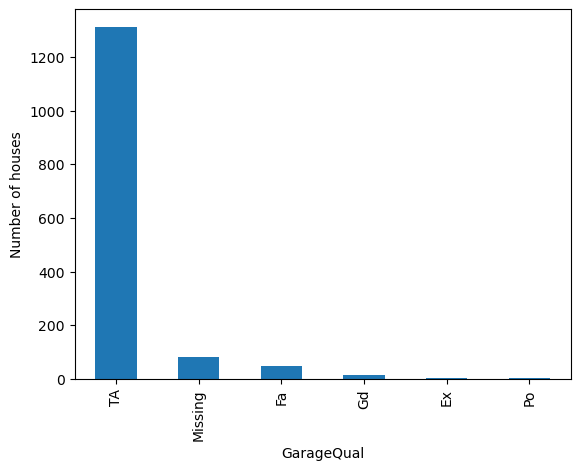

In [80]:
df['GarageQual'] = df['GarageQual'].fillna('Missing')
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

### Missing Categorical value imputation - using SK learn library

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer

In [83]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [84]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Nishant.Chauhan\Anaconda3\envs\100ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [85]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

## 5. Random Sample imputation

Impute missing values by randomly sampling from observed values of the same variable, preserving the distribution but adding randomness. Select a value from a similar record in the dataset (based on other variables). This method ensures imputed values are realistic and within plausible ranges.

- Preserves the variance of the variable
- This is applicable to both numerical and categorical data
- Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations
- Well suited for linear models as it does not distort the distribution, regardless of the % of NA
- This may not be good for decision tree algorithm, as we are introducing the randomness in the data.
- It will also change the covariance and correlation because of the randomness introduced by it.
- It will not impact the outliers

Sklearn do not have this feature, we need to use Pandas to apply this algorithm

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('train_1.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [90]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [92]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [93]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [95]:
train_age = X_train['Age'].dropna()

# Train
m_tr = X_train['Age_imputed'].isna()
X_train.loc[m_tr, 'Age_imputed'] = (
    train_age.sample(n=int(m_tr.sum()), replace=True, random_state=42).to_numpy()
)

# Test (sample from TRAIN distribution)
m_te = X_test['Age_imputed'].isna()
X_test.loc[m_te, 'Age_imputed'] = (
    train_age.sample(n=int(m_te.sum()), replace=True, random_state=42).to_numpy()
)

In [96]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([40.  , 47.  , 27.  , 52.  , 26.  ,  8.  , 28.  , 39.  , 36.  ,
       26.  , 35.  , 26.  , 40.  , 58.  , 54.  , 45.  , 29.  ,  9.  ,
       28.  , 45.  , 24.  , 38.  ,  3.  , 33.  , 34.  ,  6.  , 54.  ,
        2.  , 61.  , 36.  , 57.  , 24.  , 27.  , 18.  , 52.  , 19.  ,
       39.  , 16.  , 17.  ,  9.  , 18.  , 33.  , 23.  , 43.  , 36.  ,
       64.  , 24.  , 20.  , 33.  , 56.  ,  1.  , 62.  , 24.  , 32.  ,
       27.  ,  8.  , 36.  , 30.  ,  6.  , 25.  , 31.  , 36.  , 22.  ,
        1.  , 16.  , 42.  ,  8.  ,  3.  , 62.  , 31.  , 27.  , 44.  ,
       29.  , 40.  , 24.  , 45.  , 20.  , 27.  , 23.  , 34.  , 28.5 ,
       23.  , 51.  , 24.  , 20.  , 15.  , 28.  , 19.  , 17.  , 24.  ,
       33.  ,  5.  , 27.  , 24.  , 47.  , 25.  , 27.  , 30.  , 42.  ,
       21.  , 13.  , 34.  , 31.  , 33.  , 14.5 , 31.  , 32.  , 15.  ,
       34.  , 26.  , 32.  , 24.  , 27.  , 45.  , 24.  , 34.  , 40.  ,
       44.  , 33.  , 40.  , 16.  , 56.  , 25.  ,  0.75, 28.  , 39.  ,
       18.  ,  0.83,

In [97]:
X_train['Age'].isnull().sum()

np.int64(148)

In [98]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


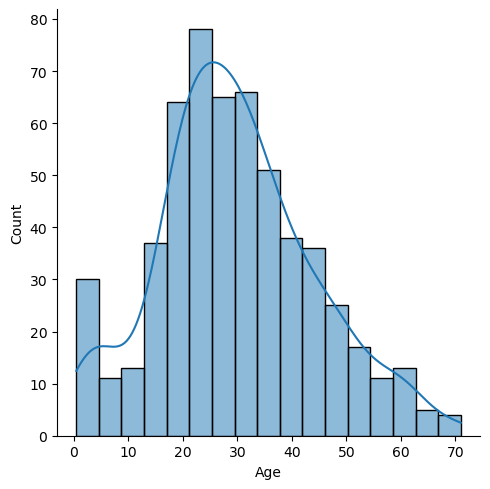

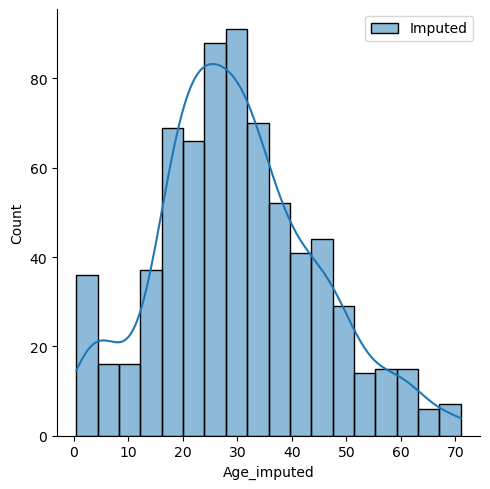

In [102]:
sns.displot(X_train['Age'],label='Original',kde='hist')
sns.displot(X_train['Age_imputed'],label = 'Imputed',kde='hist')

plt.legend()
plt.show()

In [103]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  209.9738087372983


In [104]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.934221
Age,71.512440,204.349513,204.349513
Age_imputed,53.934221,204.349513,209.973809


<Axes: >

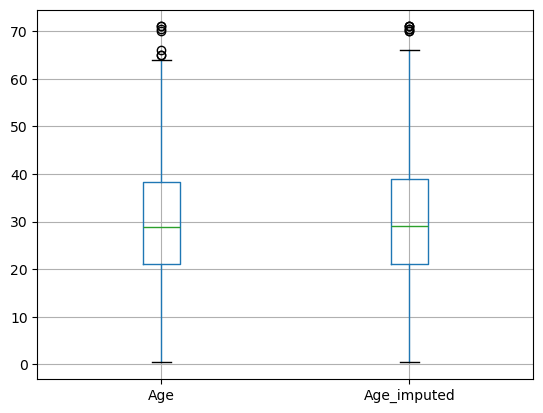

In [105]:
X_train[['Age', 'Age_imputed']].boxplot()

## 6. Automatically Select best imputer - Grid Search

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [108]:
df = pd.read_csv('train_1.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [110]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [111]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [114]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [115]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [116]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [117]:
from sklearn import set_config

set_config(display='diagram')
clf

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [118]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [119]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [120]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [121]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
7,1.0,constant,median,0.787852
6,1.0,constant,mean,0.787852
5,1.0,most_frequent,median,0.787852
4,1.0,most_frequent,mean,0.787852
11,10.0,constant,median,0.787852
10,10.0,constant,mean,0.787852
9,10.0,most_frequent,median,0.787852
8,10.0,most_frequent,mean,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852


## 7. Missing Indicator

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator, SimpleImputer

In [124]:
df = pd.read_csv('train_1.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [125]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [127]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [128]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]], shape=(712, 2))

In [129]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [130]:
mi = MissingIndicator()

mi.fit(X_train)

,missing_values,nan
,features,'missing-only'
,sparse,'auto'
,error_on_new,True


In [131]:
mi.features_

array([0])

In [132]:
X_train_missing = mi.transform(X_train)

In [133]:
X_test_missing = mi.transform(X_test)

In [134]:
X_train['Age_NA'] = X_train_missing

In [135]:
X_test['Age_NA'] = X_test_missing

In [136]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [137]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [143]:
# Add_indicator - This is to include missing indicator class with Sklearn library otherwise we can use Pandas
si = SimpleImputer(add_indicator=True) 

In [144]:
X_train = si.fit_transform(X_train)

In [145]:
X_test = si.transform(X_test)

In [146]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_trf2,y_train)
y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173